In [69]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [99]:
img = cv2.imread('./test/2.jpg')
img.shape

(3088, 2316, 3)

**So the image is three diamention, (100,100,3) -> (x,y,z)-> z is the RGB channels**

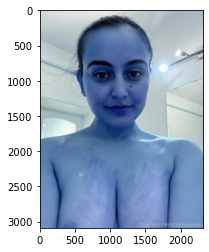

In [100]:
plt.imshow(img)

In [101]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #if you want to convert it to grey pic
gray.shape

(3088, 2316)

In [102]:
gray

array([[217, 215, 214, ..., 184, 184, 184],
       [217, 216, 215, ..., 184, 184, 184],
       [217, 216, 216, ..., 184, 184, 184],
       ...,
       [154, 156, 159, ..., 149, 150, 147],
       [151, 154, 156, ..., 150, 150, 147],
       [156, 156, 155, ..., 146, 146, 144]], dtype=uint8)

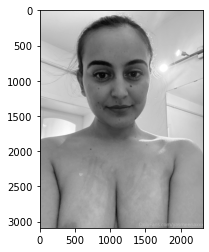

In [103]:
plt.imshow(gray, cmap='gray')

**Haar cascade is a cool technique to detect the face in images**

In [104]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')

In [105]:
type(face_cascade)

cv2.CascadeClassifier

In [106]:
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')
faces = face_cascade.detectMultiScale(gray)   #grey is the grey image of farahani
#faces = face_cascade.detectMultiScale(gray, 1.3, 5) 
faces

array([[ 471,  407, 1285, 1285]], dtype=int32)

In [107]:
type(faces)

numpy.ndarray

In [108]:
(x,y,w,h) = faces[0]
x,y,w,h

(471, 407, 1285, 1285)

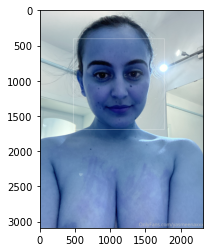

In [109]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,255),2) #(255,0,0) is (R,G,B) R is 255 means Red ,
#rectangle diamention will be started with x,y and ended up with (x+w,y+h)
plt.imshow(face_img)

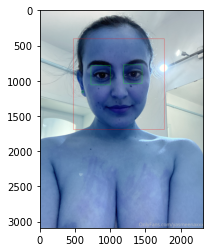

In [110]:

cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

**(2) Preprocessing: Crop the facial region of the image**

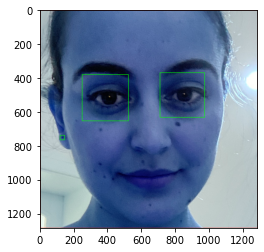

In [111]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [112]:
cropped_img = np.array(roi_color)
cropped_img.shape

(1285, 1285, 3)

# (3) Preprocessing: Use wavelet transform as a feature for traning our model
**In wavelet transformed image, you can see edges clearly and that can give us clues on various facial features such as eyes, nose, lips etc
Wavelet transform**

In [113]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

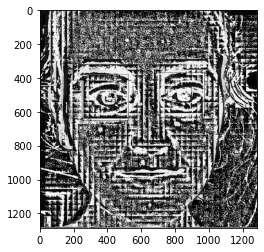

In [114]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

**You can see above a wavelet transformed image that gives clues on facial features such as eyes, nose, lips etc. This along with raw pixel image can be used as an input for our classifier
(3) Preprocessing: Load image, detect face. If eyes >=2, then save and crop the face region
Lets write a python function that can take input image and returns cropped image (if face and eyes >=2 are detected)**

In [115]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

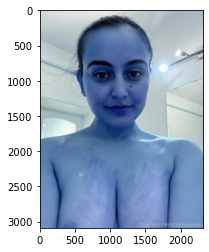

In [117]:
original_image = cv2.imread('./test/2.jpg')
plt.imshow(original_image)

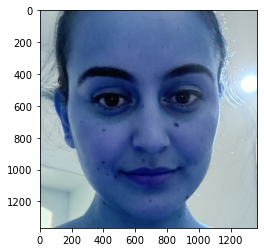

In [118]:
cropped_image = get_cropped_image_if_2_eyes('./test/2.jpg')
plt.imshow(cropped_image)

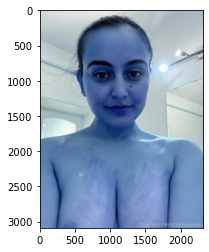

In [119]:
org_image_obstructed = cv2.imread('./test/2.jpg')
plt.imshow(org_image_obstructed)

In [120]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./test/2.jpg')
cropped_image_no_2_eyes

array([[[179, 194, 196],
        [179, 194, 196],
        [179, 194, 196],
        ...,
        [177, 189, 191],
        [178, 190, 192],
        [178, 190, 192]],

       [[179, 194, 196],
        [180, 195, 197],
        [180, 195, 197],
        ...,
        [177, 189, 191],
        [178, 190, 192],
        [178, 190, 192]],

       [[180, 195, 197],
        [180, 195, 197],
        [180, 195, 197],
        ...,
        [177, 189, 191],
        [178, 190, 192],
        [178, 190, 192]],

       ...,

       [[239, 252, 244],
        [239, 252, 244],
        [239, 252, 244],
        ...,
        [168, 188, 193],
        [168, 188, 193],
        [166, 185, 190]],

       [[239, 252, 244],
        [238, 251, 243],
        [238, 251, 243],
        ...,
        [167, 187, 192],
        [168, 188, 193],
        [167, 186, 191]],

       [[239, 252, 244],
        [238, 251, 243],
        [238, 251, 243],
        ...,
        [168, 188, 193],
        [169, 189, 194],
        [168, 187, 192]]

**Above cropped_image_no_2_eyes is None which means we should ignore this image and we will not use such image for model training**

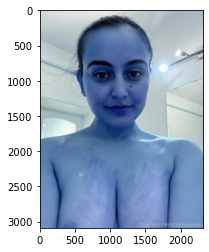

In [121]:
org_image = cv2.imread('./test/2.jpg')
plt.imshow(org_image)

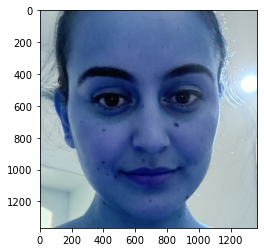

In [122]:
cropped_image_no_3_eyes = get_cropped_image_if_2_eyes('./test/2.jpg')
plt.imshow(cropped_image_no_3_eyes)

In [140]:
path_to_data = "./Dataset/"
path_to_cr_data = "./Dataset/cropped/"

In [141]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)  #it will go throuth all the sub directories within my Dataset folder

In [142]:
img_dirs    #those folders name is stored in the Variebe img_dirs

['./Dataset/cropped',
 './Dataset/denisespeelman',
 './Dataset/golshifteh farahani',
 './Dataset/Jissel',
 './Dataset/messi',
 './Dataset/ronaldo',
 './Dataset/yasmeena']

**Go through all images in dataset folder and create cropped images for them. There will be cropped folder inside dataset folder after you run this code**

In [143]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)    # It creates a croppedd folder

In [144]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]  #it splits dataset folder name and the sub folder by '/' and takes the celeb's name
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)

Generating cropped images in folder:  ./Dataset/cropped/denisespeelman
Generating cropped images in folder:  ./Dataset/cropped/golshifteh farahani
Generating cropped images in folder:  ./Dataset/cropped/Jissel
Generating cropped images in folder:  ./Dataset/cropped/messi
Generating cropped images in folder:  ./Dataset/cropped/ronaldo
Generating cropped images in folder:  ./Dataset/cropped/yasmeena


### Now you should have cropped folder under datasets folder that contains cropped images
**Manually examine cropped folder and delete any unwanted images**

In [145]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict


{'denisespeelman': ['./Dataset/cropped/denisespeelman\\denisespeelman1.png'],
 'golshifteh farahani': ['./Dataset/cropped/golshifteh farahani\\golshifteh farahani1.png'],
 'Jissel': ['./Dataset/cropped/Jissel\\Jissel1.png'],
 'messi': ['./Dataset/cropped/messi\\messi1.png'],
 'ronaldo': ['./Dataset/cropped/ronaldo\\ronaldo1.png'],
 'yasmeena': ['./Dataset/cropped/yasmeena\\yasmeena1.png']}